In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from glob import glob
import os

from ast import literal_eval

In [218]:
# Read our results

data = dict()
# To read the solution as a list
list_converter = literal_eval

results_csvs = glob(os.path.join(os.pardir, "results", "*.csv"))
for file_path in results_csvs:
    # Read csv
    df = pd.read_csv(file_path, converters={"final_solution": list_converter,
                                            "initial_solution": list_converter})
    file_name = file_path.split("/")[-1]
    instance_name = file_name.split("_")[0]
    # Drop the cvs extension
    method_name = "_".join(file_name.split("_")[1:])[:-4]
    if instance_name not in data.keys():
        data[instance_name] = dict()
    data[instance_name][method_name] = df
data

{'had20.dat': {'greedy':    run                                     final_solution  final_evaluation  \
  0    0  [2, 4, 9, 11, 10, 5, 6, 17, 1, 13, 18, 0, 8, 3...              6958   
  1    1  [8, 0, 13, 17, 15, 18, 6, 10, 3, 11, 9, 16, 1,...              6958   
  2    2  [14, 15, 18, 7, 5, 13, 6, 16, 0, 11, 10, 4, 1,...              6956   
  3    3  [2, 19, 1, 10, 9, 11, 17, 0, 4, 6, 18, 13, 5, ...              7018   
  4    4  [3, 15, 18, 10, 11, 0, 4, 9, 12, 5, 1, 13, 2, ...              7154   
  5    5  [0, 4, 18, 10, 11, 5, 9, 2, 15, 13, 1, 6, 16, ...              7092   
  6    6  [5, 13, 1, 2, 11, 18, 10, 9, 12, 15, 17, 16, 1...              7094   
  7    7  [7, 14, 15, 13, 18, 5, 6, 9, 0, 11, 10, 16, 1,...              6930   
  8    8  [2, 4, 9, 10, 11, 17, 13, 18, 1, 6, 5, 0, 15, ...              6972   
  9    9  [2, 1, 4, 5, 10, 6, 11, 17, 16, 13, 18, 0, 8, ...              6984   
  
                                      initial_solution  initial_evaluation  \
  0  

In [219]:
# Read solutions
data_path = os.path.join(os.pardir, "data", "qapdatsol")
for instance in data.keys():
    solution_file = instance[:-3] + "sln"
    print(solution_file)
    full_path = os.path.join(data_path, solution_file)

    f = open(full_path, "r")
    first_line = f.readline().strip().split(" ")
    # The first line contains the instance size
    # And the evaluation of the OPT
    n, opt = int(first_line[0]), float(first_line[-1])
    data[instance]["n"] = n
    data[instance]["opt"] = opt
    opt_sol = []
    while True:
        line = f.readline()
        if not line:
            break
        elements = [ele for ele in line.strip().split(" ") if len(ele) > 0]
        # Additional comma split if necessary
        if len(elements) == 1:
            elements = elements[0].split(",")
        elements = list(map(int, elements))
        opt_sol.extend(elements)
    data[instance]["opt_sol"] = opt_sol
    f.close()

had20.sln
els19.sln
nug30.sln
nug15.sln
esc128.sln
tai60a.sln
bur26c.sln
wil100.sln


In [220]:
# Sort instances by size
data = dict(sorted(data.items(), key=lambda tup: tup[1]["n"]))

In [221]:
for instance in data.keys():
    print(instance, data[instance].keys())

nug15.dat dict_keys(['steepest', 'heuristic', 'greedy_300', 'random-walk', 'random', 'steepest_300', 'greedy', 'n', 'opt', 'opt_sol'])
els19.dat dict_keys(['steepest_300', 'greedy', 'random-walk', 'heuristic', 'greedy_300', 'steepest', 'random', 'n', 'opt', 'opt_sol'])
had20.dat dict_keys(['greedy', 'heuristic', 'steepest_300', 'random', 'greedy_300', 'random-walk', 'steepest', 'n', 'opt', 'opt_sol'])
bur26c.dat dict_keys(['random-walk', 'heuristic', 'greedy_300', 'random', 'greedy', 'steepest_300', 'steepest', 'n', 'opt', 'opt_sol'])
nug30.dat dict_keys(['random-walk', 'random', 'greedy_300', 'steepest', 'greedy', 'steepest_300', 'heuristic', 'n', 'opt', 'opt_sol'])
tai60a.dat dict_keys(['steepest', 'random-walk', 'heuristic', 'random', 'greedy_300', 'greedy', 'steepest_300', 'n', 'opt', 'opt_sol'])
wil100.dat dict_keys(['heuristic', 'steepest', 'random', 'steepest_300', 'greedy_300', 'greedy', 'random-walk', 'n', 'opt', 'opt_sol'])
esc128.dat dict_keys(['heuristic', 'steepest_300', '

In [222]:
import matplotlib
import seaborn as sns
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
cmap = matplotlib.colormaps["tab10"]

In [223]:
# For saving the plots
save_path = os.path.join(os.getcwd(), "saved_plots")

In [224]:
# Common for plots
instance_sizes = [data[instance]["n"] for instance in data.keys()]
methods = ['random-walk', 'heuristic', 'random', 'greedy', 'steepest']
color_dict = {method : cmap(float(i/len(methods))) for i, method in enumerate(methods)}

In [225]:
instance_sizes

[15, 19, 20, 26, 30, 60, 100, 128]

# Quality

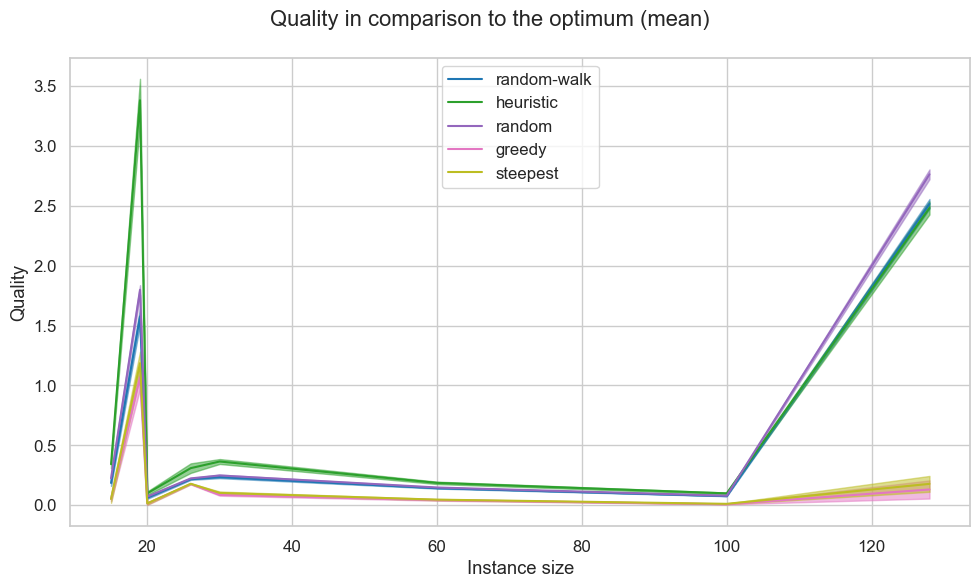

In [226]:
fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    means = []
    variations = []
    for instance in data.keys():
        instance_mean = data[instance][method]["final_evaluation"].mean()
        # Coefficient of vatioation is std/mean
        coeff_of_variation = data[instance][method]["final_evaluation"].std() / instance_mean
        diff = (instance_mean - data[instance]["opt"])/data[instance]["opt"]
        means.append(diff)
        variations.append(coeff_of_variation)
    means = np.array(means)
    variations = np.array(variations)
    ax.plot(instance_sizes, means, label = method, color=color_dict[method])
    ax.fill_between(instance_sizes, means - variations,
                    means + variations,
                    color=color_dict[method], alpha=0.5)
    ax.set_xlabel("Instance size")
    ax.set_ylabel("Quality")

fig.suptitle("Quality in comparison to the optimum (mean)")
fig.tight_layout()
plt.legend()
plt.show()

fig.savefig(os.path.join(save_path, "quality_mean.pdf"))

# Quality - best case

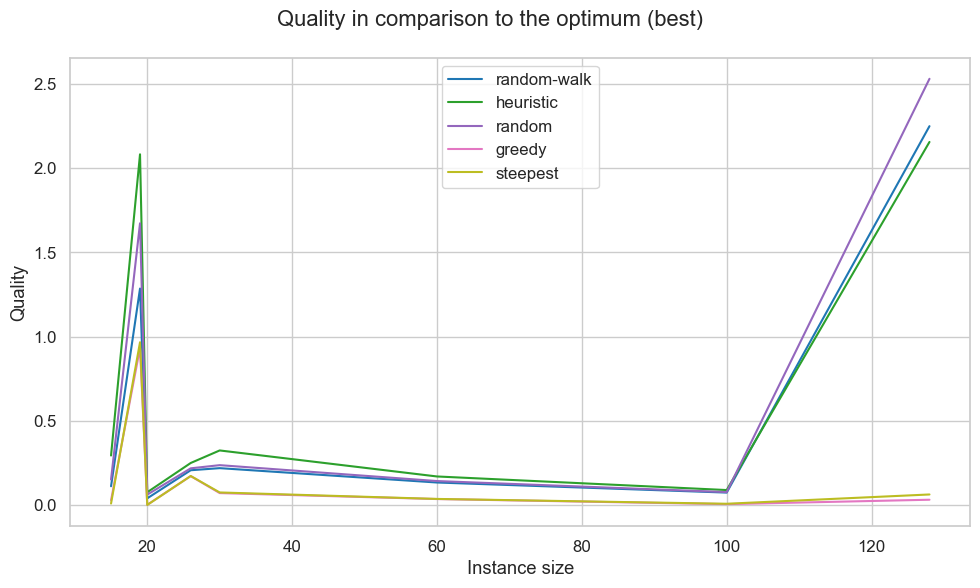

In [227]:
fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    means = []
    for instance in data.keys():
        instance_mean = data[instance][method]["final_evaluation"].min()
        diff = (instance_mean - data[instance]["opt"])/data[instance]["opt"]
        means.append(diff)
    means = np.array(means)
    variations = np.array(variations)
    ax.plot(instance_sizes, means, label = method, color=color_dict[method])
    ax.set_xlabel("Instance size")
    ax.set_ylabel("Quality")

fig.suptitle("Quality in comparison to the optimum (best)")
fig.tight_layout()
plt.legend()
plt.show()
fig.savefig(os.path.join(save_path, "quality_best.pdf"))

# Quality - worst case

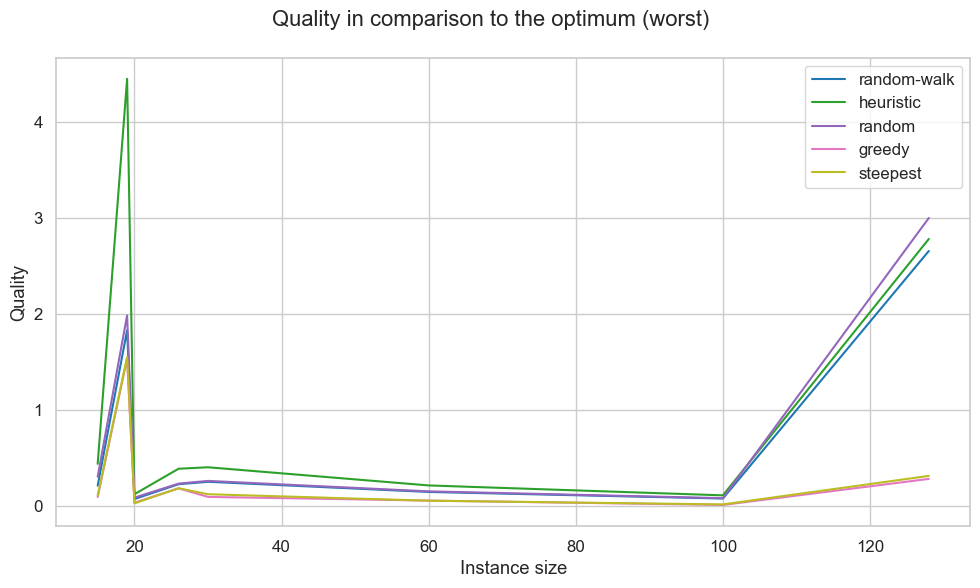

In [228]:
fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    means = []
    for instance in data.keys():
        instance_mean = data[instance][method]["final_evaluation"].max()
        diff = (instance_mean - data[instance]["opt"])/data[instance]["opt"]
        means.append(diff)
    means = np.array(means)
    variations = np.array(variations)
    ax.plot(instance_sizes, means, label = method, color=color_dict[method])
    ax.set_xlabel("Instance size")
    ax.set_ylabel("Quality")

fig.suptitle("Quality in comparison to the optimum (worst)")
fig.tight_layout()
plt.legend()
plt.show()

fig.savefig(os.path.join(save_path, "quality_worst.pdf"))

# Running Time

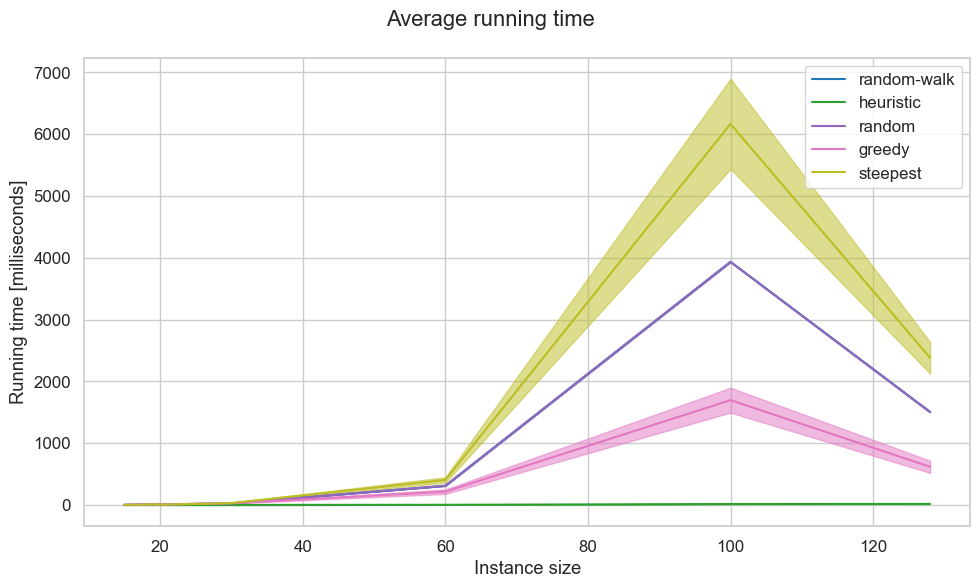

In [229]:
fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    means = []
    stds = []
    for instance in data.keys():
        instance_mean = data[instance][method]["time"].mean()
        # Coefficient of vatioation is std/mean
        std = data[instance][method]["time"].std()
        means.append(instance_mean)
        stds.append(std)
    means = np.array(means)
    stds = np.array(stds)
    ax.plot(instance_sizes, means, label = method, color=color_dict[method])
    ax.fill_between(instance_sizes, means-stds,
                    means + stds,
                    color=color_dict[method], alpha=0.5)
    ax.set_xlabel("Instance size")
    ax.set_ylabel("Running time [milliseconds]")

fig.suptitle("Average running time")
fig.tight_layout()
plt.legend()
plt.show()
fig.savefig(os.path.join(save_path, "time_mean.pdf"))

# Efficiency (Quality vs time)

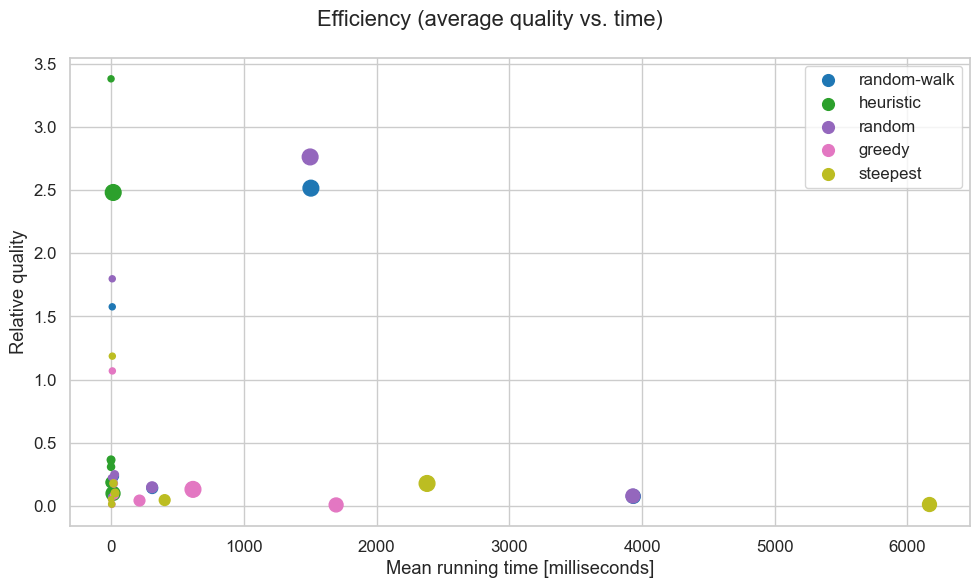

In [230]:
fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    quality_means = []
    time_means = []
    for instance in data.keys():
        quality_mean = data[instance][method]["final_evaluation"].mean()
        diff = (quality_mean - data[instance]["opt"])/data[instance]["opt"]
        time_mean = data[instance][method]["time"].mean()
        quality_means.append(diff)
        time_means.append(time_mean)
    ax.scatter(time_means, quality_means, s=instance_sizes, label = method, color=color_dict[method])
    ax.set_xlabel("Mean running time [milliseconds]")
    ax.set_ylabel("Relative quality")

fig.suptitle("Efficiency (average quality vs. time)")
fig.tight_layout()
plt.legend()
plt.show()

fig.savefig(os.path.join(save_path, "efficiency.pdf"))

# G,S: average number of algorithm steps (step = changing the current solution)

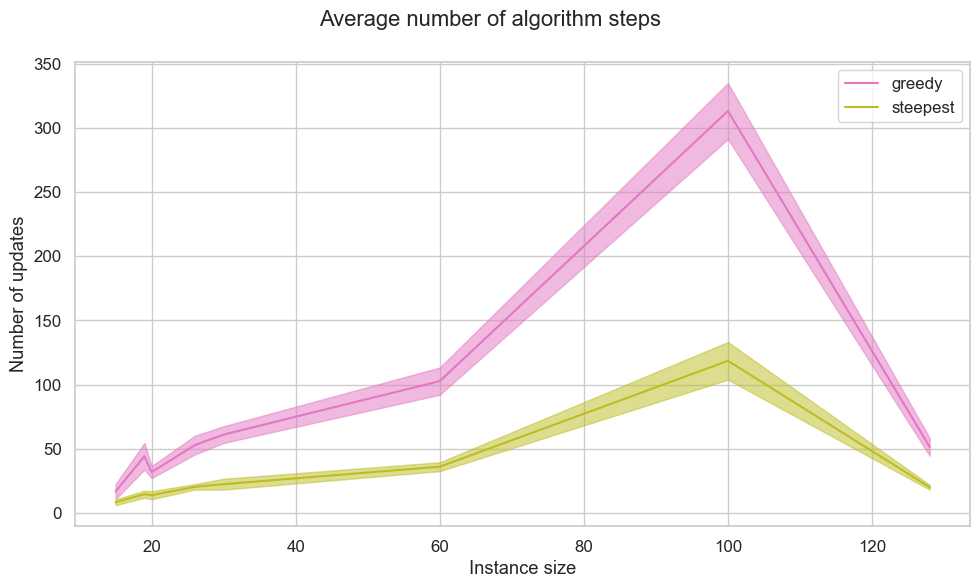

In [231]:
methods = ["greedy", "steepest"]

fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    step_means = []
    stds = []
    for instance in data.keys():
        step_mean = data[instance][method]["updates"].mean()
        step_means.append(step_mean)
        std = data[instance][method]["updates"].std()
        stds.append(std)
    means = np.array(step_means)
    stds = np.array(stds)
    ax.plot(instance_sizes, step_means, label = method, color=color_dict[method])
    ax.fill_between(instance_sizes, means-stds,
                    means + stds,
                    color=color_dict[method], alpha=0.5)
    ax.set_xlabel("Instance size")
    ax.set_ylabel("Number of updates")

fig.suptitle("Average number of algorithm steps")
fig.tight_layout()
plt.legend()
plt.show()

fig.savefig(os.path.join(save_path, "updates.pdf"))

# G,S,R,RW: average number of evaluated (i.e., visited – full or partial evaluation) solutions

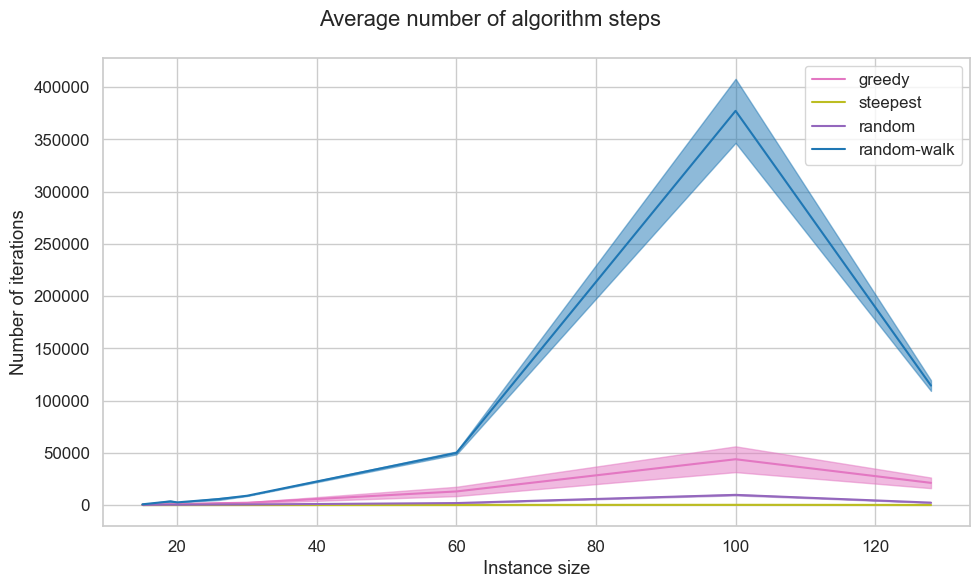

In [232]:
methods = ["greedy", "steepest", "random", "random-walk"]

fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    step_means = []
    stds = []
    for instance in data.keys():
        step_mean = data[instance][method]["iterations"].mean()
        step_means.append(step_mean)
        std = data[instance][method]["iterations"].std()
        stds.append(std)
    means = np.array(step_means)
    stds = np.array(stds)
    ax.plot(instance_sizes, step_means, label = method, color=color_dict[method])
    ax.fill_between(instance_sizes, means-stds,
                    means + stds,
                    color=color_dict[method], alpha=0.5)
    ax.set_xlabel("Instance size")
    ax.set_ylabel("Number of iterations")

fig.suptitle("Average number of algorithm steps")
fig.tight_layout()
plt.legend()
plt.show()

fig.savefig(os.path.join(save_path, "number_of_evaluations_mean.pdf"))

# G,S – plot: quality of the initial solution vs. quality of the final solution

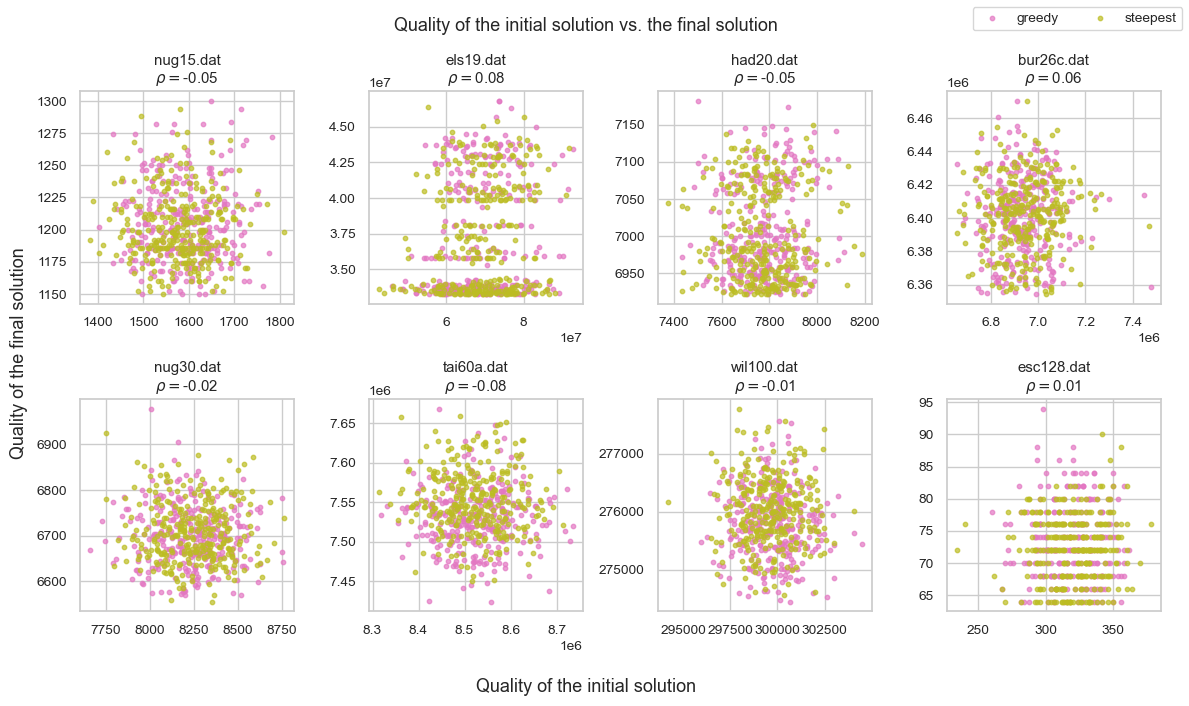

In [233]:
sns.set(font_scale=0.9)
sns.set_style("whitegrid")
methods = ["greedy_300", "steepest_300"]

fig, axs = plt.subplots(2, 4, figsize = (12,7))


for i, instance in enumerate(data.keys()):
    for method in methods:
        label = method.split("_")[0]
        axs.flat[i].scatter(data[instance][method]["initial_evaluation"],
                data[instance][method]["final_evaluation"],
                color=color_dict[label],
                label=label,
                alpha=0.7,
                s=10)
        correlation = data[instance][method]["initial_evaluation"].corr(data[instance][method]["final_evaluation"], "spearman")
        axs.flat[i].set_title(f"{instance}\n" + r"$\rho=$" + f"{correlation:.2f}")

fig.suptitle("Quality of the initial solution vs. the final solution")
fig.supxlabel("Quality of the initial solution")
fig.supylabel("Quality of the final solution")

# common legend
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc = "upper right", ncol=2)

fig.tight_layout()
plt.show()

fig.savefig(os.path.join(save_path, "quality_initial_final.pdf"))

# G,S – plot: the number of restarts (up to at least 300, horizontal axis)

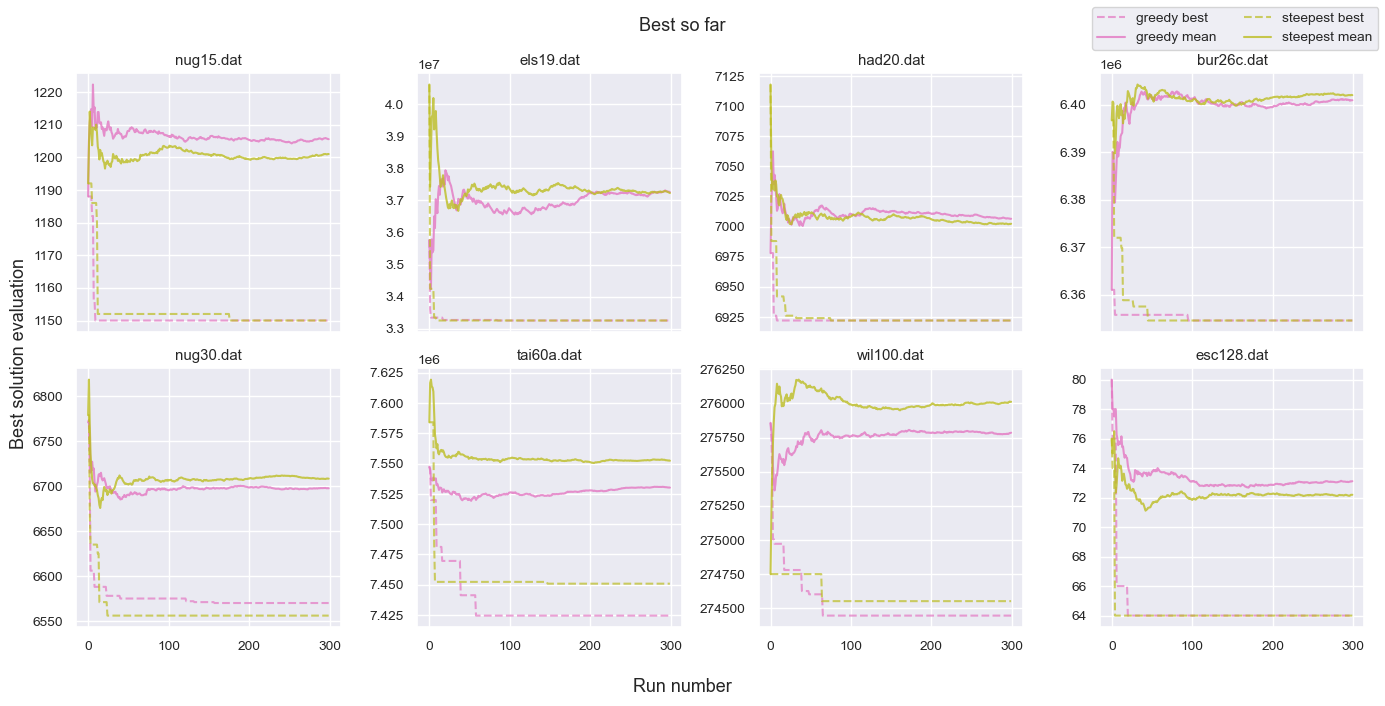

In [249]:
sns.set(font_scale=0.9)
methods = ["greedy_300", "steepest_300"]

fig, axs = plt.subplots(2, 4, figsize = (14,7), sharex=True)

for i, instance in enumerate(data.keys()):
    for method in methods:
        label = method.split("_")[0]
        # Best
        axs.flat[i].plot(data[instance][method].index,
                data[instance][method]["final_evaluation"].expanding().min(),
                color=color_dict[label],
                label=label + " best",
                alpha=0.7,
                linestyle="--")
        # Mean
        mean = data[instance][method]["final_evaluation"].expanding().mean()
        axs.flat[i].plot(data[instance][method].index,
                mean,
                color=color_dict[label],
                label=label + " mean",
                alpha=0.8)
        # Standard deviation
        stds = data[instance][method]["final_evaluation"].expanding().std()
        ax.fill_between(data[instance][method].index,
                mean-stds,
                mean + stds,
                color=color_dict[label], alpha=0.5)
        axs.flat[i].set_title(f"{instance}")

fig.suptitle("Best so far")
fig.supxlabel("Run number")
fig.supylabel("Best solution evaluation")

# common legend
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc = "upper right", ncol=2)

fig.tight_layout()
plt.show()

fig.savefig(os.path.join(save_path, "cumulative_best.pdf"))

# Objective assessment of the similarity of locally optimal solutions found for two selected instances

In [235]:
# !pip install levenshtein

In [236]:
from Levenshtein import distance, ratio
distance([1, 2, 3], [3, 2, 1])

2

ratio:

Calculates a normalized indel similarity in the range [0, 1].
The indel distance calculates the minimum number of insertions and deletions required to change one sequence into the other.

This is calculated as 1 - (distance / (len1 + len2))

https://rapidfuzz.github.io/Levenshtein/levenshtein.html#ratio

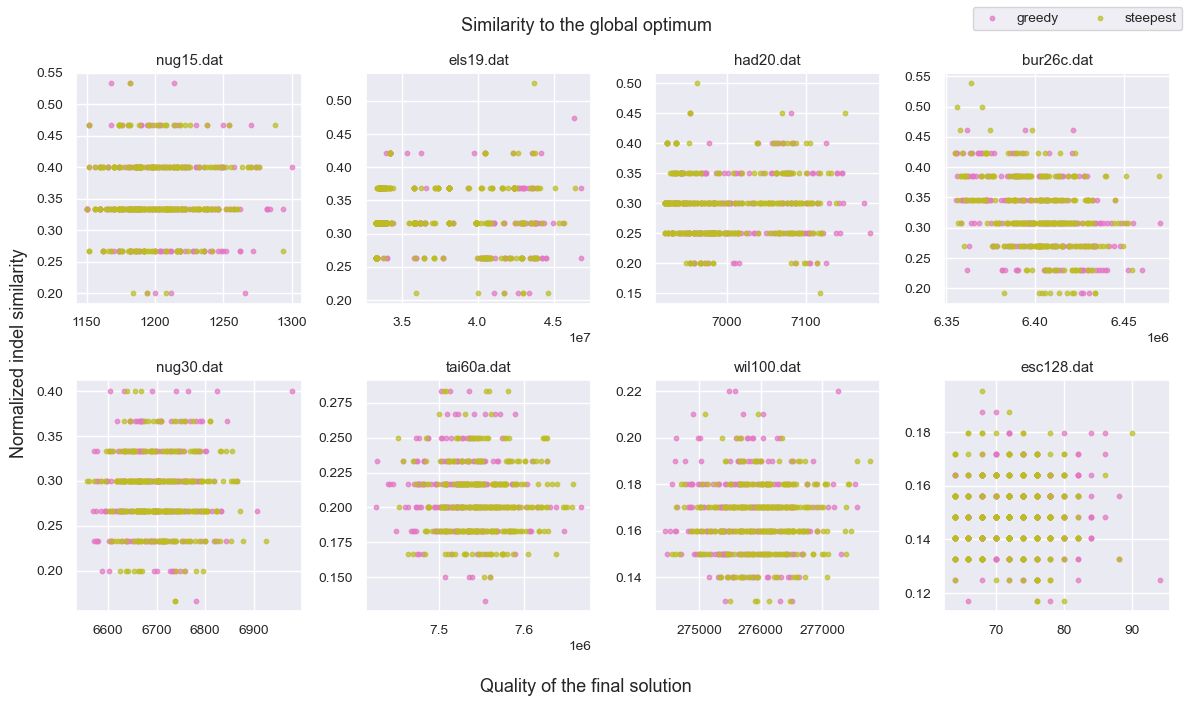

In [237]:
sns.set(font_scale=0.9)
methods = ["greedy_300", "steepest_300"]

fig, axs = plt.subplots(2, 4, figsize = (12,7))

for i, instance in enumerate(data.keys()):
    for method in methods:
        label = method.split("_")[0]
        opt_sol = data[instance]["opt_sol"]
        distances = data[instance][method].apply(lambda x: ratio(x['final_solution'],  opt_sol), axis=1)
        axs.flat[i].scatter(data[instance][method]["final_evaluation"],
                distances,
                color=color_dict[label],
                label=label,
                alpha=0.7,
                s=10)
        axs.flat[i].set_title(f"{instance}")

fig.suptitle("Similarity to the global optimum")
fig.supxlabel("Quality of the final solution")
fig.supylabel("Normalized indel similarity")

# common legend
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc = "upper right", ncol=2)

fig.tight_layout()
plt.show()

fig.savefig(os.path.join(save_path, "distance_to_optimum.pdf"))

<AxesSubplot:>

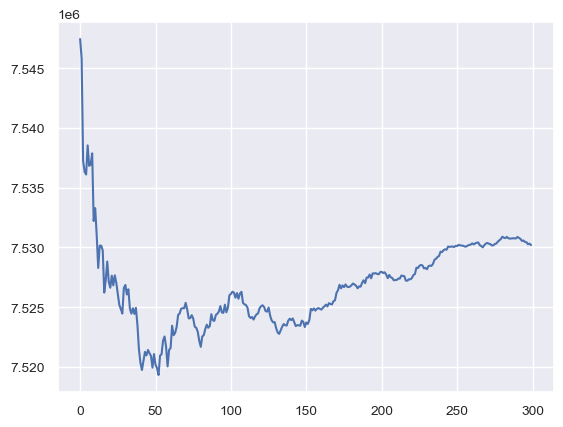

In [251]:
data["tai60a.dat"]["greedy_300"]["final_evaluation"].expanding().mean().plot()